# Clustering using DBSCAN

### import packages

In [179]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### read and create data frame and clean data 

In [180]:
df = pd.read_csv('Customer.csv')
cdf = df.drop(columns='CustomerID' , axis = 1)
cdf

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Pre processing

In [181]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Female','Male'])
gender = cdf['Gender'].values
gender = le_sex.transform(gender) 
cdf['Sex'] = gender
cdf = cdf.drop(columns='Gender' , axis = 1)
cdf

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


### normilize 

In [182]:
featureset = cdf[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)' , 'Sex']].values
featureset = StandardScaler().fit_transform(featureset)
featureset

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

### Modeling

In [183]:
epsilon = 0.5
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(featureset)
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  1,  1,  0,
       -1,  1, -1,  0, -1,  0, -1,  1, -1, -1, -1, -1,  0, -1, -1,  0, -1,
       -1,  1, -1,  0, -1, -1, -1, -1,  0, -1,  2,  0, -1, -1, -1,  0,  2,
       -1, -1,  2, -1,  0, -1, -1, -1, -1,  1, -1,  0,  2, -1, -1, -1,  0,
       -1, -1, -1,  2, -1, -1, -1, -1, -1,  2, -1, -1,  2,  2, -1,  0,  0,
        0, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1,  3, -1,  3,
       -1, -1, -1,  3, -1, -1, -1,  3, -1, -1, -1,  3, -1, -1, -1, -1, -1,
        3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,  3, -1,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [184]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

4

### plot clusters

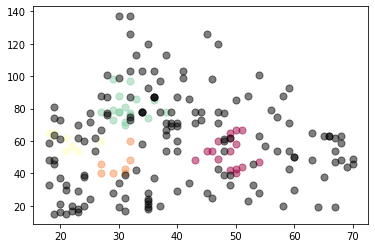

In [185]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Create colors for the clusters.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

# K-Means Clustering

### import packages

In [186]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### read and create and clean data frame

In [187]:
df = pd.read_csv('Customer.csv')
cdf = df.drop(columns='CustomerID' , axis = 1)
cdf

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Pre processing

In [188]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Female','Male'])
gender = cdf['Gender'].values
gender = le_sex.transform(gender) 
cdf['Sex'] = gender
cdf = cdf.drop(columns='Gender' , axis = 1)
cdf

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


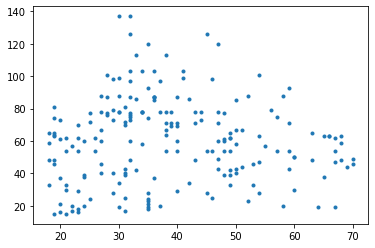

In [189]:
X = cdf.values
plt.scatter(X[:, 0], X[:, 1], marker='.')

### Setting up K-Means

In [190]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12).fit(X)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>.

In [191]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster_centers\_ </b> and save it as <b> k_means_cluster_centers </b>.

In [192]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[40.39473684, 87.        , 18.63157895,  0.52631579],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [44.89473684, 48.70526316, 42.63157895,  0.37894737],
       [24.82142857, 28.71428571, 74.25      ,  0.5       ]])

### Creating the Visual Plot

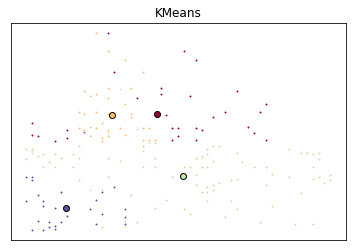

In [193]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()